In [2]:
import keras
from keras.layers import Dense
from keras.models import Sequential

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

print("Keras version is: ", keras.__version__)

Keras version is:  2.2.4


In [20]:
train_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# dataset info can be retrieved from below link
#https://archive.ics.uci.edu/ml/datasets/iris

dataframe = pd.read_csv(train_path)

print("dataframe shape:", dataframe.shape)
print("dataframe head", dataframe.head())

y = dataframe.iloc[:, dataframe.shape[1] - 1:]
print("labels shape: ", y.shape)
print("labels head", y.head())

X = dataframe.drop(columns=y)
print("data shape: ", X.shape)

print("data head", X.head())

dataframe shape: (149, 5)
dataframe head    5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
labels shape:  (149, 1)
labels head    Iris-setosa
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa
data shape:  (149, 4)
data head    5.1  3.5  1.4  0.2
0  4.9  3.0  1.4  0.2
1  4.7  3.2  1.3  0.2
2  4.6  3.1  1.5  0.2
3  5.0  3.6  1.4  0.2
4  5.4  3.9  1.7  0.4


The labels of the dataframe (i.e. y) are of text type, thus it requires to be encoded to numircal values so that the model can use it and understand it.

In [21]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

In [22]:
# preparing a train, val(development) and test sets.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2)

In [23]:
# a callback to stop the traning once a desired accuracy is reached.

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epock, logs={}):
        if logs.get('acc') > 0.97:
            print("\nReached 97 percent accuracy so cacelling training")
            self.model.stop_training = True


callback = myCallback()

In [25]:
# building a model
#this is a categorical classification problem, thus the suitable loss function will be the -
# - categorical_crossentropy and metric for model verification is accuracy
# the last layer will use softmax so that the model can pick the output with highest propability.
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(3, activation="softmax"))

    model.compile(optimizer='adam',
                  loss="categorical_crossentropy", metrics=["accuracy"])

    return model

model = build_model()

print(model.summary())

W0806 18:52:30.172128 140399925294912 deprecation_wrapper.py:119] From /home/axis/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 18:52:30.186027 140399925294912 deprecation_wrapper.py:119] From /home/axis/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 18:52:30.187800 140399925294912 deprecation_wrapper.py:119] From /home/axis/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 18:52:30.210055 140399925294912 deprecation_wrapper.py:119] From /home/axis/anaconda3/envs/ml/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Opti

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
history = model.fit(x_train, y_train, epochs=200,
                    validation_data=(x_val, y_val), verbose=2, callbacks=[callback])

W0806 18:52:48.322031 140399925294912 deprecation.py:323] From /home/axis/anaconda3/envs/ml/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0806 18:52:48.358675 140399925294912 deprecation_wrapper.py:119] From /home/axis/anaconda3/envs/ml/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 95 samples, validate on 24 samples
Epoch 1/200
 - 1s - loss: 1.7125 - acc: 0.2842 - val_loss: 1.1757 - val_acc: 0.5417
Epoch 2/200
 - 0s - loss: 1.5740 - acc: 0.2842 - val_loss: 1.1375 - val_acc: 0.5417
Epoch 3/200
 - 0s - loss: 1.4644 - acc: 0.2842 - val_loss: 1.1151 - val_acc: 0.5417
Epoch 4/200
 - 0s - loss: 1.3706 - acc: 0.2737 - val_loss: 1.1035 - val_acc: 0.1667
Epoch 5/200
 - 0s - loss: 1.2842 - acc: 0.1895 - val_loss: 1.0966 - val_acc: 0.2083
Epoch 6/200
 - 0s - loss: 1.2308 - acc: 0.3474 - val_loss: 1.0930 - val_acc: 0.2500
Epoch 7/200
 - 0s - loss: 1.1721 - acc: 0.3684 - val_loss: 1.0918 - val_acc: 0.2500
Epoch 8/200
 - 0s - loss: 1.1360 - acc: 0.3684 - val_loss: 1.0912 - val_acc: 0.2500
Epoch 9/200
 - 0s - loss: 1.0982 - acc: 0.3684 - val_loss: 1.0908 - val_acc: 0.2500
Epoch 10/200
 - 0s - loss: 1.0660 - acc: 0.3684 - val_loss: 1.0926 - val_acc: 0.2500
Epoch 11/200
 - 0s - loss: 1.0465 - acc: 0.3684 - val_loss: 1.0938 - val_acc: 0.2500
Epoch 12/200
 - 0s - loss: 1.0

Epoch 97/200
 - 0s - loss: 0.3606 - acc: 0.9053 - val_loss: 0.5102 - val_acc: 0.7083
Epoch 98/200
 - 0s - loss: 0.3579 - acc: 0.9158 - val_loss: 0.5077 - val_acc: 0.7083
Epoch 99/200
 - 0s - loss: 0.3552 - acc: 0.9158 - val_loss: 0.5029 - val_acc: 0.7500
Epoch 100/200
 - 0s - loss: 0.3526 - acc: 0.9158 - val_loss: 0.4975 - val_acc: 0.7917
Epoch 101/200
 - 0s - loss: 0.3501 - acc: 0.9263 - val_loss: 0.4917 - val_acc: 0.8333
Epoch 102/200
 - 0s - loss: 0.3481 - acc: 0.9263 - val_loss: 0.4865 - val_acc: 0.8333
Epoch 103/200
 - 0s - loss: 0.3451 - acc: 0.9368 - val_loss: 0.4873 - val_acc: 0.8333
Epoch 104/200
 - 0s - loss: 0.3427 - acc: 0.9263 - val_loss: 0.4908 - val_acc: 0.7917
Epoch 105/200
 - 0s - loss: 0.3397 - acc: 0.9263 - val_loss: 0.4885 - val_acc: 0.7917
Epoch 106/200
 - 0s - loss: 0.3374 - acc: 0.9263 - val_loss: 0.4838 - val_acc: 0.7917
Epoch 107/200
 - 0s - loss: 0.3349 - acc: 0.9263 - val_loss: 0.4783 - val_acc: 0.8333
Epoch 108/200
 - 0s - loss: 0.3332 - acc: 0.9368 - val_lo

In [27]:
scores = model.evaluate(x_test, y_test, verbose=1)

print((model.metrics_names[1], scores[1]*100))

30/30 [==============================] - 0s 40us/step
('acc', 96.66666388511658)


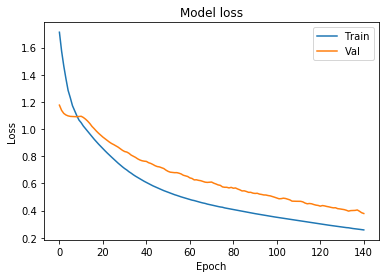

In [28]:
# Plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

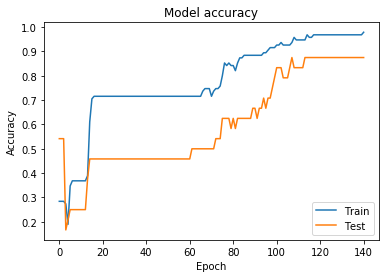

In [29]:
# plotting the accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [30]:
model.save('Iris_DL.h5')